In [ ]:
#Adi Gumelar_CV A_Batch 6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io

In [ ]:
src_image = 'drive/MyDrive/Colab Notebooks/CVProject2/cocotraindataset2017'
src_annotation = 'drive/MyDrive/Colab Notebooks/CVProject2/annotations_trainval2017/annotations/instances_train2017.json'

coco_obj = COCO(src_annotation)

loading annotations into memory...
Done (t=30.38s)
creating index...
index created!


In [ ]:
# Reading the json file
with open(src_annotation, 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [ ]:
# Basic High Level Information

n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categories = len(root['categories'])

# height, width
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categories)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

Number of images:  118287
Number of bounding boxes:  860001
Number of classes:  80
Max min avg height:  640 51 484
Max min avg width:  640 59 577


In [ ]:
# Objects per image distribution

img2nboxes = {} # mapping "image id" to "number of boxes"

for ann in root['annotations']:
    img_id = ann['image_id']

    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

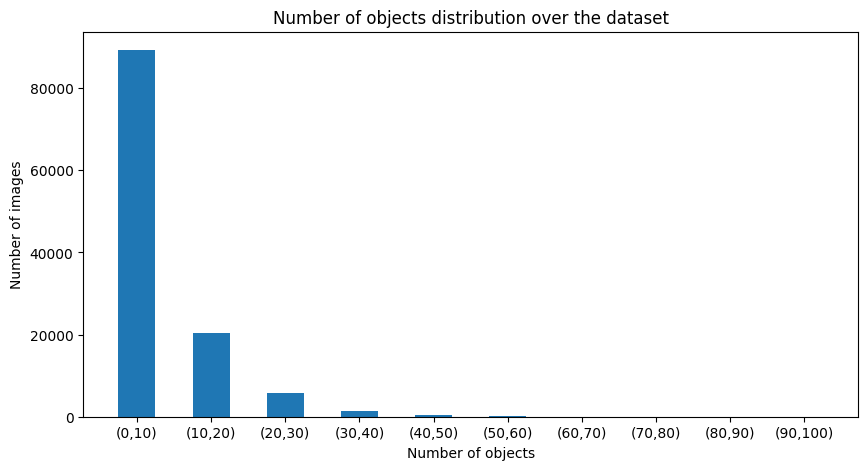

Number of images having atleast one box:  117266
Min number of boxes per image:  1
Max number of boxes per image:  93
Avg number of boxes per image:  7


In [ ]:
out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels]
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

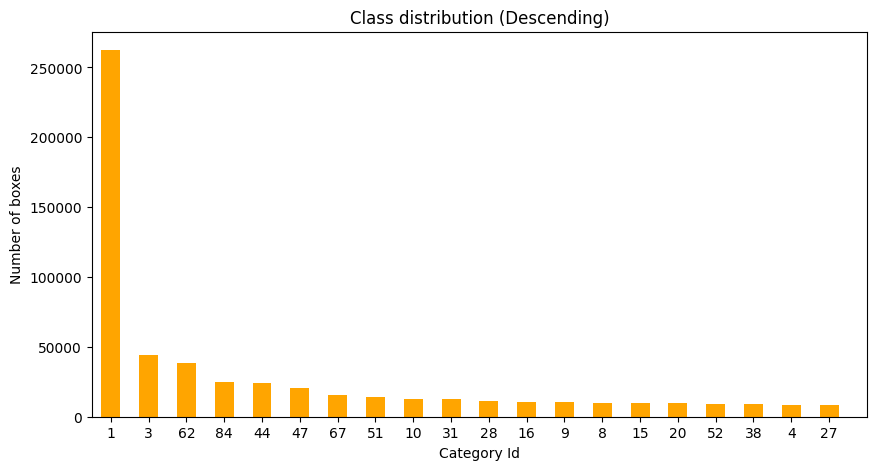

1 -> person, 2 -> bicycle, 3 -> car, 4 -> motorcycle, 5 -> airplane, 6 -> bus, 7 -> train, 8 -> truck, 9 -> boat, 10 -> traffic light, 11 -> fire hydrant, 13 -> stop sign, 14 -> parking meter, 15 -> bench, 16 -> bird, 17 -> cat, 18 -> dog, 19 -> horse, 20 -> sheep, 21 -> cow, 22 -> elephant, 23 -> bear, 24 -> zebra, 25 -> giraffe, 27 -> backpack, 28 -> umbrella, 31 -> handbag, 32 -> tie, 33 -> suitcase, 34 -> frisbee, 35 -> skis, 36 -> snowboard, 37 -> sports ball, 38 -> kite, 39 -> baseball bat, 40 -> baseball glove, 41 -> skateboard, 42 -> surfboard, 43 -> tennis racket, 44 -> bottle, 46 -> wine glass, 47 -> cup, 48 -> fork, 49 -> knife, 50 -> spoon, 51 -> bowl, 52 -> banana, 53 -> apple, 54 -> sandwich, 55 -> orange, 56 -> broccoli, 57 -> carrot, 58 -> hot dog, 59 -> pizza, 60 -> donut, 61 -> cake, 62 -> chair, 63 -> couch, 64 -> potted plant, 65 -> bed, 67 -> dining table, 70 -> toilet, 72 -> tv, 73 -> laptop, 74 -> mouse, 75 -> remote, 76 -> keyboard, 77 -> cell phone, 78 -> micro

In [ ]:
# Class distribution
class2nboxes = {}

for ann in root['annotations']:
    cat_id = ann['category_id']

    if cat_id in class2nboxes.keys():
        class2nboxes[cat_id] += 1
    else:
        class2nboxes[cat_id] = 1

sorted_c2nb = [(k,v)for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top = min(len(sorted_c2nb),20)

# to plot
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='orange')
plt.xlim(-0.5,len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution (Descending)')
plt.show()

categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

In [ ]:
# Class wise bounding box area distribution

bbox_areas = {} # key: class index, value -> a list of bounding box areas

for ann in root['annotations']:
    area = ann['area']
    cat_id = ann['category_id']

    if area <= 0.0:
        continue

    if cat_id in bbox_areas.keys():
        bbox_areas[cat_id].append(area)
    else:
        bbox_areas[cat_id] = [area]


bbox_avg_areas = []

for cat in bbox_areas.keys():
    areas = bbox_areas[cat]
    avg_area = int(sum(areas)/len(areas))

    bbox_avg_areas.append((cat,avg_area))

bbox_avg_areas = sorted(bbox_avg_areas, key = lambda x: x[1])

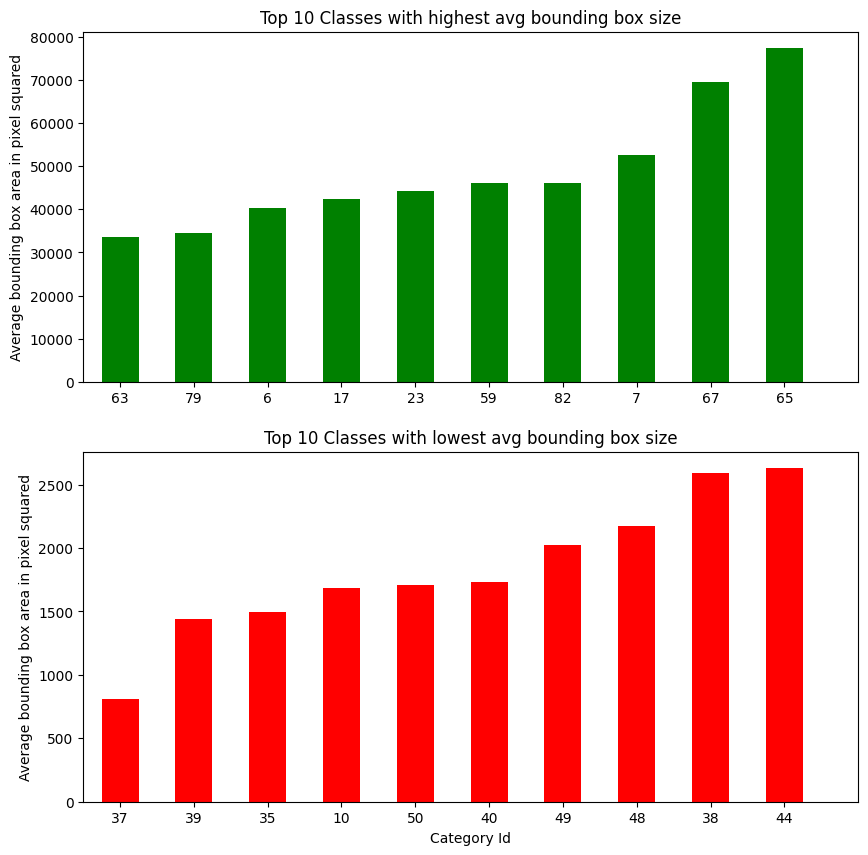

1 -> person, 2 -> bicycle, 3 -> car, 4 -> motorcycle, 5 -> airplane, 6 -> bus, 7 -> train, 8 -> truck, 9 -> boat, 10 -> traffic light, 11 -> fire hydrant, 13 -> stop sign, 14 -> parking meter, 15 -> bench, 16 -> bird, 17 -> cat, 18 -> dog, 19 -> horse, 20 -> sheep, 21 -> cow, 22 -> elephant, 23 -> bear, 24 -> zebra, 25 -> giraffe, 27 -> backpack, 28 -> umbrella, 31 -> handbag, 32 -> tie, 33 -> suitcase, 34 -> frisbee, 35 -> skis, 36 -> snowboard, 37 -> sports ball, 38 -> kite, 39 -> baseball bat, 40 -> baseball glove, 41 -> skateboard, 42 -> surfboard, 43 -> tennis racket, 44 -> bottle, 46 -> wine glass, 47 -> cup, 48 -> fork, 49 -> knife, 50 -> spoon, 51 -> bowl, 52 -> banana, 53 -> apple, 54 -> sandwich, 55 -> orange, 56 -> broccoli, 57 -> carrot, 58 -> hot dog, 59 -> pizza, 60 -> donut, 61 -> cake, 62 -> chair, 63 -> couch, 64 -> potted plant, 65 -> bed, 67 -> dining table, 70 -> toilet, 72 -> tv, 73 -> laptop, 74 -> mouse, 75 -> remote, 76 -> keyboard, 77 -> cell phone, 78 -> micro

In [ ]:
top = min(10, len(bbox_avg_areas))

plt.figure(figsize=(10,10))

y = [item[1] for item in bbox_avg_areas[-top:]]
x = [item[0] for item in bbox_avg_areas[-top:]]

y2 = [item[1] for item in bbox_avg_areas[:top]]
x2 = [item[0] for item in bbox_avg_areas[:top]]

plt.subplot(211)
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='green')
plt.xlim(-0.5,len(y))
# plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with highest avg bounding box size')

plt.subplot(212)
plt.bar(np.arange(len(y2)),y2, width=0.5,tick_label=x2,color='red')
plt.xlim(-0.5,len(y2))
plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with lowest avg bounding box size')
plt.show()

categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

In [ ]:
#root['images']
ds_images = []
for x in root['images']:
  if os.path.exists(src_image + '/' + x['file_name']):
    ds_images.append(x)

len(ds_images)

5000

['stop sign', 'car']


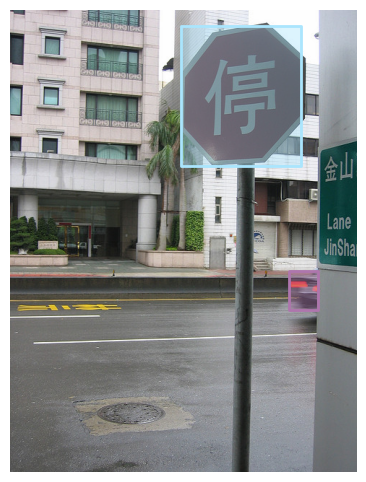

In [ ]:
# generate a random image
imgIds = [i['id'] for i in ds_images]
catIds = [i['id'] for i in root['categories']]
img = coco_obj.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_path= os.path.join(src_image, img['file_name'])
I = io.imread(img_path)

# plot annotations
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(I)
annIds = coco_obj.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_obj.loadAnns(annIds)

#  disable segmentation
for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox=True)
classes = [categ_map[a['category_id']] for a in anns]
print(classes)

Modelling

In [ ]:
# Download the python code (use this for download base split_dataset.py
# Modified split_dataset.py in google drive
#!gdown https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB

Downloading...
From (original): https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB
From (redirected): https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB&confirm=t&uuid=0ebe2642-93be-428d-bc9d-0ec869f4baa6
To: /content/split_dataset.py
100% 3.73k/3.73k [00:00<00:00, 19.6MB/s]


In [ ]:
# Split the dataset (use code below if not yet split dataset)
!python split_dataset.py --train 80 --validation 10 --test 10 --folder 'drive/MyDrive/Colab Notebooks/CVProject2/cocotraindataset2017' --folderlabel 'drive/MyDrive/Colab Notebooks/CVProject2/cocotrainlabel2017' --dest objectdetectionproject_dataset

In [3]:
# Install YOLO
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [4]:
#edit requirements.txt for commenting pip install numpy, I use installed numpy in google colab
%cd /content/yolov7
%pip install -r requirements.txt

/content/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00


In [5]:
%cd /content/yolov7/

/content/yolov7


In [6]:
# if needed, change nc, labels at YoloV7/cfg/training/yolov7.yaml and yolov7-e6e.yaml, must same as from coco.yaml
!python train.py --device 0 --batch-size 8 --epochs 15 --img 640 640 --data /content/coco.yaml --hyp /content/hyperparameter.yaml --name yolov7-objectdetection --weights yolov7-e6e.pt

2024-10-20 13:22:16.957204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 13:22:16.976235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 13:22:16.981954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 13:22:16.995931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 13:22:18.247394: W tensorflow/comp

In [8]:
!python detect.py --weights runs/train/yolov7-objectdetection/weights/best.pt --conf 0.25 --img-size 640 --source '/content/drive/MyDrive/Colab Notebooks/CVProject2/objectdetectionproject_dataset/images/test/'

Namespace(weights=['runs/train/yolov7-objectdetection/weights/best.pt'], source='/content/drive/MyDrive/Colab Notebooks/CVProject2/objectdetectionproject_dataset/images/test/', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the func

In [9]:
import os

def get_ground_truth_boxes_for_image(image_id, annotations_path):
    ground_truth_boxes = []
    annotation_file = os.path.join(annotations_path, f"{image_id}.txt")

    with open(annotation_file, 'r') as file:
        for line in file:
            # Assuming each line is: class_id x_min y_min x_max y_max
            parts = line.strip().split()
            x_min, y_min, x_max, y_max = map(float, parts[1:5])
            ground_truth_boxes.append([x_min, y_min, x_max, y_max])

    return ground_truth_boxes

In [16]:
#testing path
annotations_path = '/content/drive/MyDrive/Colab Notebooks/CVProject2/objectdetectionproject_dataset/labels/test'
image_id = '000000215897'  # Example image ID
true_boxes = get_ground_truth_boxes_for_image(image_id, annotations_path)

true_boxes

[[0.607352, 0.493162, 0.227391, 0.659204],
 [0.427508, 0.504508, 0.268984, 0.747752],
 [0.362836, 0.68877, 0.704672, 0.339321]]

In [26]:
# testing object detection using best model
!python detect.py --source '/content/drive/MyDrive/Colab Notebooks/CVProject2/objectdetectionproject_dataset/images/test/000000229825.jpg' --weights /content/yolov7/runs/train/yolov7-objectdetection/weights/best.pt

Namespace(weights=['/content/yolov7/runs/train/yolov7-objectdetection/weights/best.pt'], source='/content/drive/MyDrive/Colab Notebooks/CVProject2/objectdetectionproject_dataset/images/test/000000229825.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped

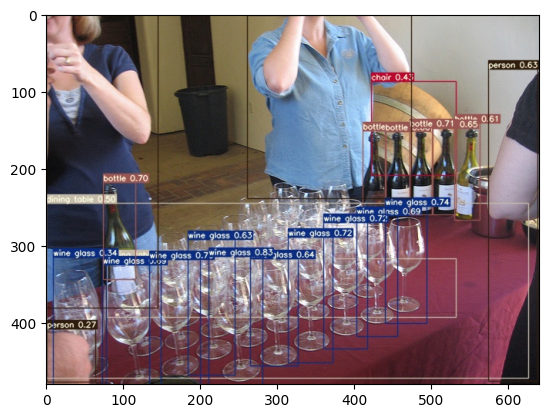

In [28]:
# view image
import matplotlib.image as mpimg

img = mpimg.imread('runs/detect/exp5/000000229825.jpg')
imgplot = plt.imshow(img)
plt.show()

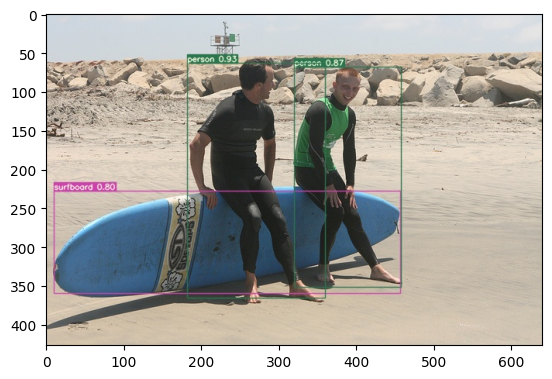

In [25]:
# view image (already tested using script above)
import matplotlib.image as mpimg

img = mpimg.imread('runs/detect/exp4/000000215897.jpg')
imgplot = plt.imshow(img)
plt.show()

In [29]:
# compress the result, manual download, contact Adi Gumelar for details
!zip -r /content/yolov7resultobjectdetection.zip /content/yolov7/runs

  adding: content/yolov7/runs/ (stored 0%)
  adding: content/yolov7/runs/detect/ (stored 0%)
  adding: content/yolov7/runs/detect/exp2/ (stored 0%)
  adding: content/yolov7/runs/detect/exp5/ (stored 0%)
  adding: content/yolov7/runs/detect/exp5/000000229825.jpg (deflated 2%)
  adding: content/yolov7/runs/detect/exp/ (stored 0%)
  adding: content/yolov7/runs/detect/exp/000000229247.jpg (deflated 0%)
  adding: content/yolov7/runs/detect/exp/000000240225.jpg (deflated 0%)
  adding: content/yolov7/runs/detect/exp/000000232691.jpg (deflated 2%)
  adding: content/yolov7/runs/detect/exp/000000220823.jpg (deflated 2%)
  adding: content/yolov7/runs/detect/exp/000000222295.jpg (deflated 3%)
  adding: content/yolov7/runs/detect/exp/000000223755.jpg (deflated 0%)
  adding: content/yolov7/runs/detect/exp/000000223481.jpg (deflated 2%)
  adding: content/yolov7/runs/detect/exp/000000228957.jpg (deflated 2%)
  adding: content/yolov7/runs/detect/exp/000000217216.jpg (deflated 3%)
  adding: content/yolo